In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from sklearn.model_selection import train_test_split as train_test
from surprise import accuracy

In [ ]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/desktop.ini
data/package_tourism.csv
data/tourism_rating.csv
data/tourism_with_id.csv
data/user.csv


In [ ]:
data_tourism_rating = pd.read_csv('data/tourism_rating.csv')
data_tourism_with_id = pd.read_csv('data/tourism_with_id.csv')
data_user = pd.read_csv('data/user.csv')

In [ ]:
data_tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
data_tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
data_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
data_tourism_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
data_tourism_with_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
data_user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [ ]:
data_tourism_with_id.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
data_tourism_with_id

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


In [ ]:
data_tourism_with_id.shape[0]

437

In [ ]:
data_tourism_with_id.dtypes

Place_Id          int64
Place_Name       object
Description      object
Category         object
City             object
Price             int64
Rating          float64
Time_Minutes    float64
Coordinate       object
Lat             float64
Long            float64
dtype: object

In [ ]:
data_user.dtypes

User_Id      int64
Location    object
Age          int64
dtype: object

In [ ]:
data_tourism_rating.dtypes

User_Id          int64
Place_Id         int64
Place_Ratings    int64
dtype: object

In [ ]:
consolidate_data = pd.merge(data_user, data_tourism_rating[['User_Id','Place_Id','Place_Ratings']],how='right',on='User_Id').drop_duplicates().sort_values('User_Id')
consolidate_data.head()

,User_Id,Location,Age,Place_Id,Place_Ratings
0,1,"Semarang, Jawa Tengah",20,179,3
28,1,"Semarang, Jawa Tengah",20,48,2
27,1,"Semarang, Jawa Tengah",20,302,2
26,1,"Semarang, Jawa Tengah",20,307,4
25,1,"Semarang, Jawa Tengah",20,328,2


In [ ]:
consolidate_data = pd.merge(consolidate_data,data_tourism_with_id[['Place_Id','Place_Name','Description','Category','City','Price','Rating','Lat','Long']],how='right',on='Place_Id').drop_duplicates()
consolidate_data.head()

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,36,"Solo, Jawa Tengah",20,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
1,38,"Serang, Banten",26,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
2,64,"Bandung, Jawa Barat",38,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
3,74,"Semarang, Jawa Tengah",30,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
4,86,"Depok, Jawa Barat",32,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153


In [ ]:
consolidate_data.isnull().sum()

User_Id          0
Location         0
Age              0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Lat              0
Long             0
dtype: int64

In [ ]:
corr_matrix = consolidate_data.corr().abs()
corr_matrix

,User_Id,Age,Place_Id,Place_Ratings,Price,Rating,Lat,Long
User_Id,1.000000,0.037964,0.000266,0.071525,0.009752,0.004851,0.005375,0.008400
Age,0.037964,1.000000,0.005931,0.016973,0.002295,0.003231,0.011846,0.005547
Place_Id,0.000266,0.005931,1.000000,0.005070,0.117431,0.136143,0.221387,0.518238
Place_Ratings,0.071525,0.016973,0.005070,1.000000,0.003373,0.002058,0.025080,0.012566
Price,0.009752,0.002295,0.117431,0.003373,1.000000,0.011919,0.166224,0.134175
Rating,0.004851,0.003231,0.136143,0.002058,0.011919,1.000000,0.013255,0.033185
Lat,0.005375,0.011846,0.221387,0.025080,0.166224,0.013255,1.000000,0.675395
Long,0.008400,0.005547,0.518238,0.012566,0.134175,0.033185,0.675395,1.000000


In [ ]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri

,User_Id,Age,Place_Id,Place_Ratings,Price,Rating,Lat,Long
User_Id,NaN,0.037964,0.000266,0.071525,0.009752,0.004851,0.005375,0.008400
Age,NaN,NaN,0.005931,0.016973,0.002295,0.003231,0.011846,0.005547
Place_Id,NaN,NaN,NaN,0.005070,0.117431,0.136143,0.221387,0.518238
Place_Ratings,NaN,NaN,NaN,NaN,0.003373,0.002058,0.025080,0.012566
Price,NaN,NaN,NaN,NaN,NaN,0.011919,0.166224,0.134175
Rating,NaN,NaN,NaN,NaN,NaN,NaN,0.013255,0.033185
Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675395
Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

[]

In [ ]:
consolidate_data

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,36,"Solo, Jawa Tengah",20,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
1,38,"Serang, Banten",26,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
2,64,"Bandung, Jawa Barat",38,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
3,74,"Semarang, Jawa Tengah",30,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
4,86,"Depok, Jawa Barat",32,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,284,"Depok, Jawa Barat",29,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,-7.242076,112.736816
9917,288,"Semarang, Jawa Tengah",30,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,-7.242076,112.736816
9918,288,"Semarang, Jawa Tengah",30,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,-7.242076,112.736816
9919,297,"Palembang, Sumatera Selatan",39,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,-7.242076,112.736816


In [ ]:
consolidate_data.head()

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,36,"Solo, Jawa Tengah",20,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
1,38,"Serang, Banten",26,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
2,64,"Bandung, Jawa Barat",38,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
3,74,"Semarang, Jawa Tengah",30,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
4,86,"Depok, Jawa Barat",32,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153


In [ ]:
consolidate_data['Category'].unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [ ]:
consolidate_data['Category'] = consolidate_data['Category'].replace('Taman Hiburan', 'Amusement Park')
consolidate_data['Category'] = consolidate_data['Category'].replace('Budaya', 'Culture')
consolidate_data['Category'] = consolidate_data['Category'].replace('Cagar Alam', 'National Park')
consolidate_data['Category'] = consolidate_data['Category'].replace('Tempat Ibadah', 'Place of Worship')
consolidate_data['Category'] = consolidate_data['Category'].replace('Bahari', 'Marine Tourism')
consolidate_data['Category'] = consolidate_data['Category'].replace('Pusat Perbelanjaan', 'Shopping Center')

In [ ]:
consolidate_data.head()

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,36,"Solo, Jawa Tengah",20,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
1,38,"Serang, Banten",26,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
2,64,"Bandung, Jawa Barat",38,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
3,74,"Semarang, Jawa Tengah",30,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
4,86,"Depok, Jawa Barat",32,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153


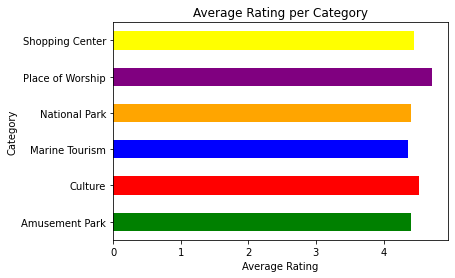

In [ ]:
colors = {'Culture': 'red', 'Amusement Park': 'green', 'Marine Tourism': 'blue', 'National Park': 'orange','Shopping Center':'yellow','Place of Worship':'purple'}

# Agrupamos los datos y calculamos el promedio de rating por categoría
grouped = consolidate_data.groupby('Category')['Rating'].mean()

# Creamos el gráfico de barras horizontales y asignamos los colores según la categoría
grouped.plot(kind='barh', color=[colors.get(c, 'black') for c in grouped.index])

# Asignamos los títulos de los ejes y del gráfico
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Rating per Category')

# Mostramos el gráfico
plt.show()

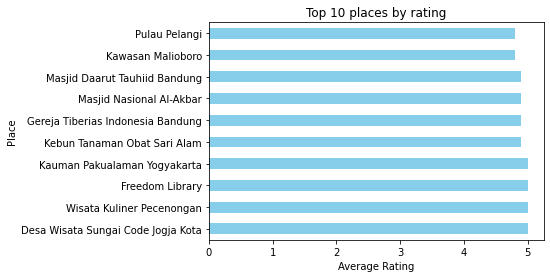

In [ ]:
grouped_place = consolidate_data.groupby('Place_Name')['Rating'].mean().sort_values(ascending=False)[:10]

# Creamos el gráfico de barras horizontales y asignamos los colores según la categoría
grouped_place.plot(kind='barh', color=[colors.get(c, 'skyblue') for c in grouped_place.index])

# Asignamos los títulos de los ejes y del gráfico
plt.xlabel('Average Rating')
plt.ylabel('Place')
plt.title('Top 10 places by rating')

# Mostramos el gráfico
plt.show()

In [ ]:
ratings_matrix = consolidate_data[['User_Id','Place_Id','Place_Ratings']].pivot_table(index='User_Id', columns='Place_Id').fillna(0)
ratings_matrix.head()

Place_Ratings                                               ...       \
Place_Id           1    2    3    4    5    6    7    8    9    10   ...  428   
User_Id                                                              ...        
1                  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  ...  3.0   
2                  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4                  0.0  0.0  0.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
5                  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  5.0  0.0  ...  0.0   

                                                       
Place_Id  429  430  431  432  433  434  435  436  437  
User_Id                                                
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.5  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5         0.0  0.0  0.0  0.0  4.0  4.0  0.0  5.0  0.0  

[5 rows x 437 columns]

In [ ]:
#Modelo basado en contenido
X= ratings_matrix_2['Place_Id']
y= ratings_matrix_2['Place_Ratings']


NameError: name 'ratings_matrix_2' is not defined

In [ ]:
#Modelo basado en KNN
from sklearn.neighbors import NearestNeighbors
modelKNN = NearestNeighbors(metric='cosine', algorithm='brute')
train_data, test_data = train_test(ratings_matrix_2, test_size=.25, random_state=42)
#train_data.head()
train_ratings = train_data.pivot_table(index='User_Id', columns='Place_Id', values='Place_Ratings').fillna(0)
test_ratings = test_data.pivot_table(index='User_Id', columns='Place_Id', values='Place_Ratings').fillna(0)
modelKNN.fit(train_ratings)
k=5
distances, indices = modelKNN.kneighbors(test_ratings, n_neighbors=k)
#Usuarios que están en el conjunto de prueba
unique_users = test_data['User_Id'].unique()
#print(len(unique_users))
#print('indices',distances)
# imprimir test ratings
#print(test_ratings.tail())
# Recomendar ítems a los usuarios en el conjunto de prueba
n_recommendations = 10
recommendations = {}
#print(test_data)
#test_ratings.to_csv('test_ratings.csv', index=False)
for i in range(len(test_ratings)):
    # Obtener los ítems ya calificados por el usuario
    rated_items = set(test_ratings.columns[test_ratings.iloc[i, :] > 0])
    #print('i: ',i+1,'r: ',rated_items)

    # Obtener los ítems recomendados por los vecinos más cercanos al usuario
    recommended_items = set()
    #print('indices ',i+1,' :',indices[i])
    #print('distances ',i+1,' :',distances[i])
    for j in range(1, k):
        neighbor_idx = indices[i, j]
        #print('neighbor: ',neighbor_idx)
        neighbor_ratings = train_ratings.iloc[neighbor_idx, :]
        #print('neighbor_ratings: ',neighbor_ratings)
        recommended_items = recommended_items.union(set(neighbor_ratings[neighbor_ratings > 0].index))

    # Obtener los ítems recomendados que el usuario no ha calificado
    recommended_items = list(recommended_items - rated_items)[:n_recommendations]
    #print('recomended: ',recommended_items)
    recommendations[i] = recommended_items
#print(recommendations)

# Imprimir las recomendaciones para algunos usuarios del conjunto de prueba
print("Recomendaciones para el usuario 1 en el conjunto de prueba: ", recommendations[0])
print("Recomendaciones para el usuario 2 en el conjunto de prueba: ", recommendations[1])
print("Recomendaciones para el usuario 3 en el conjunto de prueba: ", recommendations[2])

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cofusion_matrix_KNN = confusion_matrix(y_true, y_pred)
print(cm)

NameError: name 'ratings_matrix_2' is not defined

In [ ]:
ratings_matrix.isna().sum()

               Place_Id
Place_Ratings  1           0
               2           0
               3           0
               4           0
               5           0
                          ..
               433         0
               434         0
               435         0
               436         0
               437         0
Length: 437, dtype: int64

In [ ]:
ratings_matrix.shape

(300, 437)

In [ ]:
ratings_matrix
ratings_matrix.to_csv('archivo1.csv', index=False)

In [ ]:
ratings_matrix_2 = consolidate_data.loc[:,["User_Id","Place_Id","Place_Ratings"]]
ratings_matrix_2.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [ ]:
ratings_matrix_2.shape
all_users = consolidate_data["User_Id"].unique()
all_places = consolidate_data["Place_Id"].unique()
all_places

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
ratings_matrix_2.shape

(9921, 3)

In [ ]:
reader = Reader(rating_scale=(1, 5))
algorithm_reco = SVD()

In [ ]:
data = Dataset.load_from_df(ratings_matrix_2, reader)
trainset, testset = train_test_split(data, test_size=.25,random_state=42)
algorithm_reco.fit(trainset)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
predictions = algorithm_reco.test(testset)
accuracy.rmse(predictions)
accuracy.mse(predictions)
accuracy.mae(predictions)
y_true = [int(pred.r_ui) for pred in predictions]
y_pred = [round(pred.est) for pred in predictions]
precision, recall, f1score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted',zero_division=1)
print(precision)
print(recall)
print(f1score)

#print(predictions)
#print(y_true)
#print(y_pred)

RMSE: 1.4285
MSE: 2.0406
MAE:  1.2218
0.3082267094650634
0.21644498186215236
0.13656486797673575


In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[  1  37 347  43   0]
 [  0  34 393  71   0]
 [  0  45 408  84   1]
 [  0  33 378  94   0]
 [  0  35 407  70   0]]


In [ ]:
#print(list(trainset.all_ratings()))
print(algorithm_reco.trainset.to_inner_iid(142))
print(algorithm_reco.trainset.to_raw_iid(142))

225
286


In [ ]:
#print(predictions)
sim_matrix = np.dot(algorithm_reco.pu, algorithm_reco.qi.T)
def get_top_k_similar_items(item_id, k):
    item_index = algorithm_reco.trainset.to_inner_iid(item_id)
    item_similarities = sim_matrix[item_index]
    top_k_indices = item_similarities.argsort()[-k-1:-1][::-1]
    top_k_items = [algorithm_reco.trainset.to_raw_iid(inner_id) for inner_id in top_k_indices]
    return top_k_items

# Example usage
top_similar_items = get_top_k_similar_items(141, 5)
print(top_similar_items)

[106, 336, 297, 27, 190]


In [ ]:
user_id = 8765
place_id = 150
prediction = algorithm_reco.predict(user_id, place_id)
print(prediction)

user: 8765       item: 150        r_ui = None   est = 2.97   {'was_impossible': False}


In [ ]:
user_id = 600
n_recommendations = 5
items_to_recommend = []

# Obtener los lugares que el usuario no ha visitado aún
#places_visited = ratings_matrix_2.columns[ratings_matrix_2.loc[user_id].notnull()]
places_visited = ratings_matrix_2.loc[ratings_matrix_2['User_Id'] == user_id].dropna(axis=1, how='all')
print('Places visited')
print(places_visited)
print(places_visited.shape)
#places_not_visited = ratings_matrix_2.loc[ratings_matrix_2['User_Id'] != 10]
#print('Places not visited')
#print(places_not_visited)
#print(places_not_visited.shape)

print(ratings_matrix_2.columns.tolist())

if len(places_visited) == 0:
    places_not_visited = all_places
else:
    places_not_visited = ratings_matrix_2.loc[~ratings_matrix_2['Place_Id'].isin(places_visited['Place_Id'])]['Place_Id'].unique()
for place_id in places_not_visited:
    predicted_rating = algorithm_reco.predict(user_id, place_id).est
    items_to_recommend.append((place_id, predicted_rating))

# Para cada lugar no visitado, predecir el rating y guardar el resultado
print(data_tourism_with_id.shape)
print('Places not visited')
print(places_not_visited)
print(len(places_not_visited))
print('Items to recommend')
#print(items_to_recommend)
#print(len(items_to_recommend))

# Ordenar las recomendaciones por rating en orden descendente
items_to_recommend.sort(key=lambda x: x[1], reverse=True)

# Obtener los n lugares recomendados
recommendations = [x[0] for x in items_to_recommend[:n_recommendations]]

print('Recomendaciones')
recommendations
#print(recommendations)

for recommended_place in recommendations:
    place_data = data_tourism_with_id[data_tourism_with_id['Place_Id'] == recommended_place][['Place_Id', 'Place_Name', 'City']]
    print(place_data)



Places visited
Empty DataFrame
Columns: []
Index: []
(0, 0)
['User_Id', 'Place_Id', 'Place_Ratings']
(437, 11)
Places not visited
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 21

In [ ]:
result = ratings_matrix_2.loc[ratings_matrix_2['User_Id'] == 10]
ratings_matrix_2.to_csv('archivo.csv', index=False)
# imprimir el resultado
print(result)

      User_Id  Place_Id  Place_Ratings
240        10        12              2
371        10        18              5
477        10        23              2
747        10        35              4
774        10        36              4
925        10        42              3
1414       10        63              5
1498       10        67              5
1667       10        75              4
1716       10        77              2
2033       10        90              5
2153       10        95              5
2992       10       134              5
3229       10       145              3
3548       10       159              2
3751       10       168              5
4419       10       197              3
4616       10       205              5
5180       10       230              4
5270       10       234              3
5316       10       236              4
6056       10       268              3
6326       10       280              5
6327       10       280              4
6411       10       284  

In [ ]:
#Recomendador basado en el item
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
data_tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [ ]:
#Cargamos el lenguaje en el que esta el dataset
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_ind = stopwords.words('indonesian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TONY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.preprocessing import OneHotEncoder
city_encoder = OneHotEncoder()
city_encoded_df = city_encoder.fit_transform(data_tourism_with_id[["City"]])

# One-hot encoding en la variable Category
category_encoder = OneHotEncoder()
category_encoded_df = category_encoder.fit_transform(data_tourism_with_id[["Category"]])

tfidf = TfidfVectorizer(stop_words=stopwords_ind)
tfidf_df = tfidf.fit_transform(data_tourism_with_id['Description'])

encoded_df = pd.concat([city_encoded_df, category_encoded_df, tfidf_df], axis=1)

# Obtener indices de filas para entrenamiento y prueba
train_indices = df_train.index.values
test_indices = df_test.index.values

# Calcular matriz de similaridad coseno entre filas de train y test
similarity_matrix = cosine_similarity(encoded_df.loc[test_indices], encoded_df.loc[train_indices])

# Seleccionar los k lugares más similares para cada fila de prueba
k = 10
top_k = np.argsort(-similarity_matrix, axis=1)[:, :k]

# Obtener los IDs de los lugares más similares para cada fila de prueba
similar_places = []
for i in range(top_k.shape[0]):
    place_ids = df_train.iloc[top_k[i], :]['Place_Id'].tolist()
    similar_places.append(place_ids)


# Calcular la similitud entre sitios turísticos
similarity_matrix = cosine_similarity(tourism_features)

# Obtener los sitios turísticos más similares a un sitio turístico específico
place_id = 1
similar_places = list(enumerate(similarity_matrix[place_id]))
sorted_similar_places = sorted(similar_places, key=lambda x: x[1], reverse=True)[1:6]

# Mostrar los resultados
for i, similarity_score in sorted_similar_places:
    print(data_tourism_with_id.iloc[i]['Place_Name'], similarity_score)

C:\Users\TONY\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


TypeError: cannot concatenate object of type '<class 'scipy.sparse.csr.csr_matrix'>'; only Series and DataFrame objs are valid

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Cargar los datos
#data_tourism_with_id = pd.read_csv('tourism_with_id.csv')

# Definir las variables de características y objetivo
#X = data_tourism_with_id['Description'] + ' ' + data_tourism_with_id['Category'] + ' ' + data_tourism_with_id['City']
#y = data_tourism_with_id['Place_Id']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_tourism_with_id['Description'] + ' ' + data_tourism_with_id['Category'] + ' ' + data_tourism_with_id['City'], data_tourism_with_id['Place_Name'], test_size=0.2, random_state=42)

# Definir el vectorizador de características
tfidf = TfidfVectorizer(stop_words=stopwords_ind)

# Ajustar y transformar el conjunto de entrenamiento con el vectorizador
X_train_tfidf = tfidf.fit_transform(X_train)

# Transformar el conjunto de prueba con el vectorizador
X_test_tfidf = tfidf.transform(X_test)

# Calcular la similitud entre sitios turísticos del conjunto de prueba y entrenamiento
similarity_matrix = cosine_similarity(X_test_tfidf, X_train_tfidf)

# Obtener los sitios turísticos más similares a los sitios turísticos específicos del conjunto de prueba
n_similar_places = 1
similar_places = []
for i in range(len(X_test)):
    place_id = y_test.iloc[i]
    similarity_scores = list(enumerate(similarity_matrix[i]))
    sorted_similar_places = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:n_similar_places+1]
    similar_places.append([place_id, [data_tourism_with_id.iloc[j]['Place_Name'] for j, _ in sorted_similar_places]])

# Mostrar los resultados
#for place, similar in similar_places:
 #   print(f'Sitio turístico: {data_tourism_with_id[data_tourism_with_id["Place_Id"]==place]["Place_Name"].values[0]}')
   # print(f'Sitios turísticos similares: {similar}')
    #print('---')



In [ ]:
test_predictions = [recommendations for place_id, recommendations in similar_places]
from sklearn.metrics import classification_report
print(test_predictions)
print(y_test)
#print(classification_report(y_test, test_predictions))
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, test_predictions, average='weighted',zero_division=1)
print(precision)
print(recall)
print(f1score)

[['Museum Fatahillah'], ['Gereja Tiberias Indonesia Bandung'], ['Geoforest Watu Payung Turunan'], ['Monumen Bandung Lautan Api'], ['Galeri Indonesia Kaya'], ['Curug Luhur Waterfall'], ['Taman Pelangi Yogyakarta'], ['Mountain View Golf Club'], ['Masjid Istiqlal'], ['Taman Hutan Raya Ir. H. Juanda'], ['Wisata Alam Kalibiru'], ['Pantai Baron'], ['Situ Patenggang'], ['Taman Hutan Raya Ir. H. Juanda'], ['Pulau Tidung'], ['Taman Hutan Raya Ir. H. Juanda'], ['Pura Giri Natha'], ['Goa Jomblang'], ['Trans Studio Bandung'], ['Pulau Tidung'], ['Pantai Watu Kodok'], ['Bukit Gantole Cililin'], ['Pulau Pelangi'], ['Taman Spathodea'], ['Jogja Bay Pirates Adventure Waterpark'], ['Taman Sejarah Bandung'], ['Plaza Indonesia'], ['Desa Wisata Rumah Domes/Teletubbies'], ['Rabbit Town'], ['Monumen Batik Yogyakarta'], ['Taman Jomblo'], ['Gereja Katedral'], ['Wot Batu'], ['Kampung Wisata Sosro Menduran'], ['Desa Wisata Rumah Domes/Teletubbies'], ['Kawah Putih'], ['Sumur Gumuling'], ['Curug Cimahi'], ['Kampung

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
test_features = tfidf.transform(X_test)
test_predictions = []
for i in range(test_features.shape[0]):
    similarities = similarity_matrix[i, :]
    top_similar = X_train.iloc[np.argsort(similarities)[-6:-1]]
    test_predictions.append(top_similar['Place_Id'].tolist())

# Calcular las métricas de evaluación
precision = precision_score(y_test, test_predictions, average='micro')
recall = recall_score(y_test, test_predictions, average='micro')
f1 = f1_score(y_test, test_predictions, average='micro')

# Imprimir los resultados
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

KeyError: 'Place_Id'

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score

# Obtener los nombres de los sitios turísticos del conjunto de prueba y las recomendaciones
y_true = [place[0] for place in similar_places]
y_pred = [place[1] for place in similar_places]


print(len(y_true))
print(len(y_pred))
# Calcular las métricas
acc_score = accuracy_score(y_true, [pred[0] for pred in y_pred])
hamming_loss_score = hamming_loss(y_true, y_pred)
jaccard_score_micro = jaccard_score(y_true, [pred[0] for pred in y_pred], average='micro')
jaccard_score_macro = jaccard_score(y_true, [pred[0] for pred in y_pred], average='macro')


print(jaccard_score_micro)

88
88
0.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Recomendador basado en una red neuronal


# Cargar los datos
ratings_data = ratings_matrix_2

# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ratings_data, test_size=0.2)

# Crear los IDs para usuarios y películas
user_ids = ratings_data["User_Id"].unique().tolist()
place_ids = ratings_data["Place_Id"].unique().tolist()

# Crear los diccionarios de mapeo
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
place2place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded2place = {i: x for i, x in enumerate(place_ids)}

# Mapear los datos en los IDs
train_data["user"] = train_data["User_Id"].map(user2user_encoded)
train_data["place"] = train_data["Place_Id"].map(movie2movie_encoded)

test_data["user"] = test_data["User_Id"].map(user2user_encoded)
test_data["place"] = test_data["Place_Id"].map(movie2movie_encoded)

# Extraer las entradas y salidas
X_train = train_data[["user", "place"]].values
y_train = train_data["Place_Ratings"].values

X_test = test_data[["user", "place"]].values
y_test = test_data["Place_Ratings"].values

# Definir la arquitectura de la red neuronal
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer=keras.initializers.RandomNormal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.place_embedding = layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer=keras.initializers.RandomNormal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.dense1 = layers.Dense(64, activation="relu")
        self.dense2 = layers.Dense(1, activation="sigmoid")

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        concatenated = tf.concat([user_vector, place_vector], axis=-1)
        dense1_output = self.dense1(concatenated)
        output = self.dense2(dense1_output)
        return output

# Crear la instancia del modelo
model = RecommenderNet(
    num_users=len(user2user_encoded),
    num_places=len(place2place_encoded),
    embedding_size=32
)

# Compilar el modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=["mse"],
)

# Entrenar el modelo
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test),
)

results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
y_pred = model.predict(X_test)

# Obtener las 10 películas con mayor valoración para el usuario 1
user_id = 1
user_ratings = y_pred[:, user_id - 1]
top_10_indices = (-user_ratings).argsort()[:10]
#top_10_movies = movies_df.iloc[top_10_indices]['title']
#print(top_10_movies)

ModuleNotFoundError: No module named 'tensorflow'